In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\anugn\Downloads\Social_Network_Ads.csv')

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.shape

(400, 5)

In [10]:
df.isna().apply(pd.value_counts)

,User ID,Gender,Age,EstimatedSalary,Purchased
False,400,400,400,400,400


In [12]:
# using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [14]:
df['Gender'] = le.fit_transform(df['Gender'])

In [15]:
df['Gender'].value_counts() # female = 0 and male = 1

0    204
1    196
Name: Gender, dtype: int64

In [16]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [19]:
corr = (df.corr())
corr*100

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,100.000000,-2.524943,-0.072110,7.109732,0.712018
Gender,-2.524943,100.000000,-7.374133,-6.043469,-4.246946
Age,-0.072110,-7.374133,100.000000,15.523802,62.245420
EstimatedSalary,7.109732,-6.043469,15.523802,100.000000,36.208303
Purchased,0.712018,-4.246946,62.245420,36.208303,100.000000


In [20]:
corr[['Purchased']]

,Purchased
User ID,0.007120
Gender,-0.042469
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

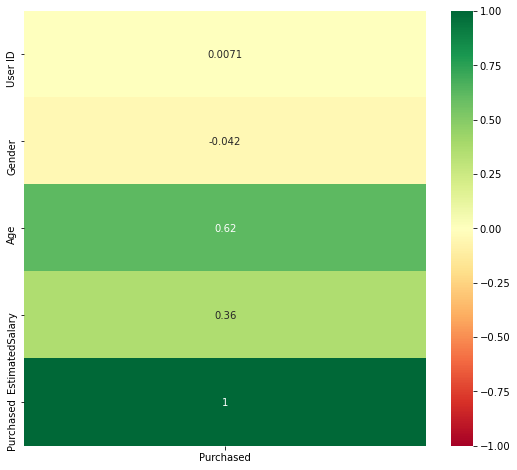

In [22]:
# heatmap for correlation
plt.figure(figsize = (9,8))
sns.heatmap(corr[["Purchased"]],cmap = 'RdYlGn',vmax = +1.0,vmin = -1.0,annot = True)
plt.show()

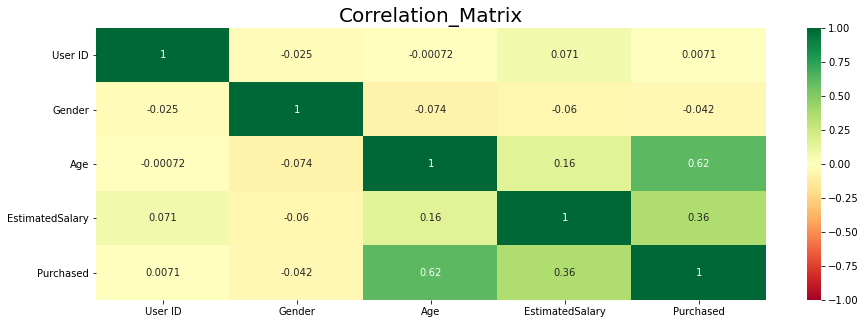

In [23]:
# Correlation Matrix heatmap
plt.figure(figsize = (15,5))
plt.title('Correlation_Matrix',fontsize=20)
sns.heatmap(corr,cmap = 'RdYlGn',vmax = +1.0,vmin = -1.0,annot = True)
plt.show()



In [25]:
# defining the independent variable/features
X = df.drop(['User ID'],axis=1)

In [26]:
Y = df[['Purchased']]

In [27]:
# checking independent variables or features
X.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [28]:
# checking dependent variable or feature
Y.head(5)

,Purchased
0,0
1,0
2,0
3,0
4,0


## Logistic Regression

In [30]:
# import train and test split 
from sklearn.model_selection import train_test_split

In [31]:
# 70:30 split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,test_size = 0.3, random_state = 1)

In [32]:
# importing the model 
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,Y_train)

LogisticRegression()

In [35]:
# test/predict
Y_pred = model.predict(X_test)

In [36]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Performance Metrics of Logistic Regression

In [37]:
# importing performance metrics from sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [38]:
# Calculating accuracy_score
accuracy_score(Y_test,Y_pred)*100

60.0

In [43]:
# Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120



In [45]:
# Confusion Matrix
cf = confusion_matrix(Y_test,Y_pred)
cf

array([[72,  0],
       [48,  0]], dtype=int64)

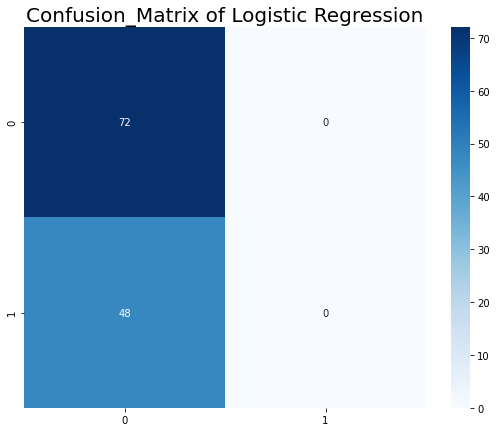

In [48]:
# heatmap for confusion matrix
plt.figure(figsize = (9,7))
plt.title('Confusion_Matrix of Logistic Regression',fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',annot = True,fmt = 'g') #fmt = 'g' is for removing exponenitial presentation
plt.show()

## K Nearest Neighbors

In [49]:
# importing KNN from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [51]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
knn_pred = knn.predict(X_test)

## KNN Performance Metrics

In [54]:
accuracy_score(Y_test,knn_pred)*100

72.5

In [55]:
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        72
           1       0.67      0.60      0.64        48

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.71       120
weighted avg       0.72      0.72      0.72       120



In [57]:
cf = confusion_matrix(Y_test,knn_pred)
cf

array([[58, 14],
       [19, 29]], dtype=int64)

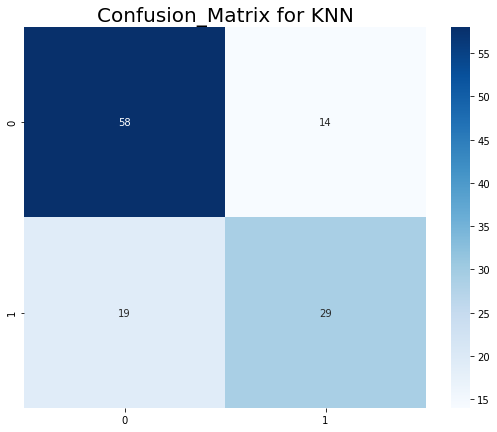

In [58]:
# Confusion Matrix heatmap
plt.figure(figsize = (9,7))
plt.title('Confusion_Matrix for KNN', fontsize = 20)
sns.heatmap(cf,cmap = 'Blues', annot = True)
plt.show()